In [ ]:
# mount my Google Drive on the VM

from google.colab import drive
drive.mount('/gdrive')

import os
import pandas as pd

DIR_FINTECH_PROJECT = '/gdrive/MyDrive/Fintech/Fintech Project'
#DIR_FINTECH_PROJECT = '/gdrive/MyDrive/Fintech Project' # Alejandro
DIR_DATA = os.path.join(DIR_FINTECH_PROJECT, 'data')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv(os.path.join(DIR_DATA, 'headlines.csv'))[['Time','Headlines']]
df = df.sort_values(by = 'Time')
df.head(5)

,Time,Headlines
0,2023-10-25 06:35:24.608617,"Stock Market News, Oct. 25, 2023: Nasdaq Close..."
1,2023-10-25 06:35:24.608617,"Ford, UAW reach tentative deal to end strike"
2,2023-10-25 06:35:24.608617,Meta is making a risky bet as it spends boatlo...
3,2023-10-25 06:35:24.608617,"Ford, UAW reach tentative deal to end strike i..."
4,2023-10-25 06:54:00.000000,Stocks to own ahead of a rally that this $15 b...


In [ ]:
!pip3 install datasets

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from datasets import load_dataset
from collections import Counter
from conlleval import evaluate
from numpy.ma.core import concatenate
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import nltk
import spacy

sentiment analysis

In [ ]:
all_headlines = ' '.join([str(x) for x in df['Headlines']])
all_headlines

"Stock Market News, Oct. 25, 2023: Nasdaq Closes in Correction Territory; Alphabet Stock Slides After Earnings Ford, UAW reach tentative deal to end strike Meta is making a risky bet as it spends boatloads on AI despite rocky ad market Ford, UAW reach tentative deal to end strike including record pay raise Stocks to own ahead of a rally that this $15 billion fund house says is coming soon Stocks clobbered, Nasdaq falls 2.5% amid Google's slide Nasdaq, S&P 500 tumble as Alphabet casts cloud Big Tech Leads Losses as Treasuries Under Pressure: Markets Wrap Stock Market Today: Nasdaq Falls; Alphabet Stock Slides After Earnings Hurricane Otis tears through Mexico's Acapulco as Category 4 storm Nasdaq and S&P 500 fall as disappointing Alphabet results and rising yields hit tech shares U.S mortgage rates soar to highest in more than 23 years Nasdaq 100 Falls 2% as Bond Yields Rise; Oil Gains: Markets Wrap S&P 500 falls to the lowest since June on disappointing Alphabet results, higher rates J

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
tokens = word_tokenize(all_headlines)
tokenstokens = word_tokenize(all_headlines)
tokens

In [ ]:
lower_tokens = [t.lower() for t in tokens]

In [ ]:
from itertools import chain
english_stops = pd.read_csv(os.path.join(DIR_DATA, 'englishstopwords.csv'), index_col = False).values.tolist()
english_stops = list(chain(*english_stops))
#Ensuring all data to be in a list

our_stops = ['i', 'http', 'yes', 'amp']
#Adding our words to not be counted


english_stops += our_stops
#Adding our list to a single big list


print(english_stops)

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', '

In [ ]:
from nltk.stem import WordNetLemmatizer


alpha_only = [t for t in lower_tokens if t.isalpha()] # Retain alphabetic words, i.e. eliminate punctuation, signs and numbers among others
no_stops = [t for t in alpha_only if t not in english_stops] # Remove all stop words

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(a) for a in no_stops ] #Doble check as Lemmatizer uses its own stops
lemmatized = [t for t in lemmatized if t not in english_stops] # Lemmatize all tokens into a new list, means to group together similar groups of words
bow = Counter(lemmatized) # Create the bag-of-words

# Print the 10 most common tokens
print(bow.most_common(10))

[('market', 80), ('stock', 77), ('wrap', 44), ('nasdaq', 41), ('p', 34), ('correction', 28), ('rise', 24), ('earnings', 23), ('fall', 22), ('amazon', 22)]


In [ ]:
one_string = ' '.join(token for token in lemmatized)
one_string

'stock market news nasdaq close correction territory alphabet stock slide earnings ford uaw reach tentative deal end strike meta making risky bet spends boatload ai despite rocky ad market ford uaw reach tentative deal end strike including record pay raise stock ahead rally billion fund house say coming soon stock clobbered nasdaq fall amid google slide nasdaq p tumble alphabet cast cloud big tech lead loss treasury pressure market wrap stock market today nasdaq fall alphabet stock slide earnings hurricane otis tear mexico acapulco category storm nasdaq p fall disappointing alphabet result rising yield hit tech share mortgage rate soar highest year nasdaq fall bond yield rise oil gain market wrap p fall lowest since june disappointing alphabet result higher rate johnson speaker bid succeeds house floor trump claim credit torpedoing emmer america emerging market kansa say recent buyer life easy new rule mean required withdrawal retirement account become even complex p tumble lowest sinc

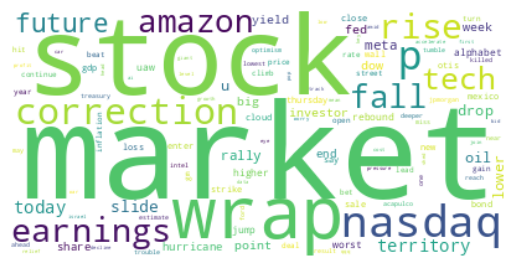

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
headlines_wc = WordCloud(collocations = False, background_color= 'white').generate(one_string)  #Create a word cloud with the string previously created
plt.imshow(headlines_wc, interpolation='bilinear') #Plotting method
plt.axis("off")
plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


new_words = {
   'stock': 100,
   'market': 100,
   'nasdaq': 50,
   'rise': 90,
   'tech': 50,
   'wrap': 20,
   'nasdaq': 50,
   'future': 40,
   'fall': -60,
   'drop': -50,
   'earnings': 50,
   'investor': 50
}